## 문제 소개

첨부된 “adult.data”와 “adult.test”은 https://archive.ics.uci.edu/ml/datasets/Adult 에서 다운로드 받은 파일임. 

분석목적: Prediction task is to determine whether a person makes over 50K a year.

- 앞의 14개 열 자료는 설명변수, 마지막 열 자료는 반응변수
- 결측값은 "?"로 표시하고 자료들은 ","로 구분
- 둘 다 - header가 없으며 “adult.test”는 2번째 줄부터 데이터 

"c-c.txt"는 국가와 대륙을 연결한 파일임
- header(한글)가 있고 ","로 구분
- "ANSI" 형식으로 저장

### 먼저 현재 노트북 이름을 여러분들의 "학번-이름"으로 변경

### 함수의 옵션이나 객체를 알고 싶은 경우에는 help(함수) 또는 dir(함수)를  참조할 수 있음
- 예: help(pandas.read_csv) 

#### 문제 1: "adult.data"의 자료를 train_df라는 pandas 데이터프레임에 대입
- 결측값 처리 또는 header 처리를 할 수 없는 경우 파일을 엑셀에서 수정한 후 읽을 수 있음(단, 감점)
- train_df.iloc[9475:9480, ]을 실행하면 아래와 같이 나옴
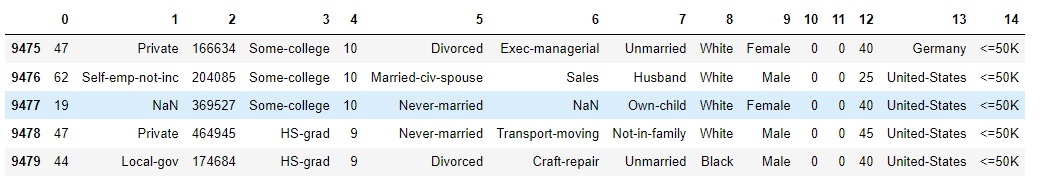


In [1]:
import pandas as pd
train_df = pd.read_csv('adult.data',  header=None, encoding='cp949')


In [2]:
train_df.iloc[9475:9480, ]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
9475,47,Private,166634,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,Germany,<=50K
9476,62,Self-emp-not-inc,204085,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,United-States,<=50K
9477,19,?,369527,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
9478,47,Private,464945,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,45,United-States,<=50K
9479,44,Local-gov,174684,HS-grad,9,Divorced,Craft-repair,Unmarried,Black,Male,0,0,40,United-States,<=50K


#### 문제 2: "adult.test"의 자료를 test_df라는 pandas 데이터프레임에 대입
- 결측값, header, 첫 줄 처리를 할 수 없는 경우 파일을 엑셀에서 수정한 후 읽을 수 있음(단, 감점)
- test_df.head()로 결과 확인
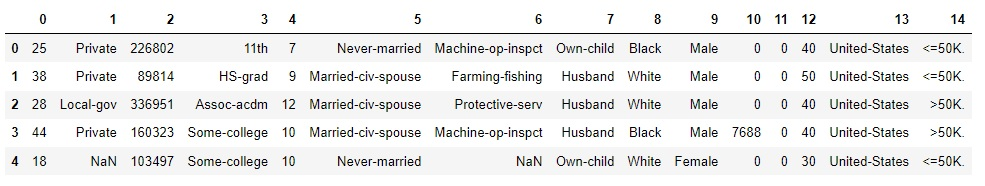

In [12]:
test_df = pd.read_csv('adult.data',  header=None, encoding='cp949')
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### 문제 3: train_df와 test_df의 변수명(columns 이름)을 X1 ~ X14, Y로 수정 
- 설명변수: X1 ~ X14
    - X = age : continuous
    - X2 = workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    - X3 = fnlwgt: continuous.
    - X4 = education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    - X5 = education-num: continuous.
    - X6 = marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    - X7 = occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    - X8 = relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    - X9 = race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    - X10 = sex: Female, Male.
    - X11 = capital-gain: continuous.
    - X12 = capital-loss: continuous.
    - X13 = hours-per-week: continuous.
    - X14 = native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- 반응변수: Y = (>50K, <=50K).
- train_df.info()로 결과확인

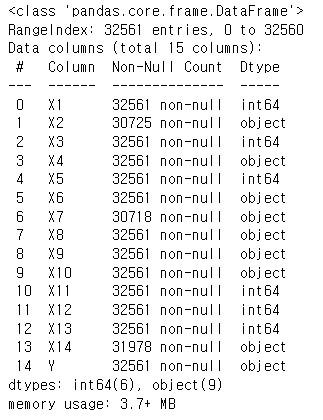

In [14]:
train_df.columns = ['X1','X2', 'X3','X4','X5', 'X6','X7','X8', 'X9','X10', 'X11', 'X12','X13', 'X14', 'Y']
test_df.columns = ['X1','X2', 'X3','X4','X5', 'X6','X7','X8', 'X9','X10', 'X11', 'X12','X13', 'X14', 'Y']
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      32561 non-null  int64 
 1   X2      32561 non-null  object
 2   X3      32561 non-null  int64 
 3   X4      32561 non-null  object
 4   X5      32561 non-null  int64 
 5   X6      32561 non-null  object
 6   X7      32561 non-null  object
 7   X8      32561 non-null  object
 8   X9      32561 non-null  object
 9   X10     32561 non-null  object
 10  X11     32561 non-null  int64 
 11  X12     32561 non-null  int64 
 12  X13     32561 non-null  int64 
 13  X14     32561 non-null  object
 14  Y       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      32561 non-null  int64 
 1   X2

#### 문제 4: "c-c.txt" 자료를 CC라는 pandas 데이터프레임에 대입 
- 자료 중 NA는 결측값이 아니고 North America의 약자임
- CC.head()로 확인
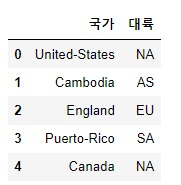

In [15]:
CC = pd.read_csv("c-c.txt", encoding='cp949')
CC.head()

,국가,대륙
0,United-States,NaN
1,Cambodia,AS
2,England,EU
3,Puerto-Rico,SA
4,Canada,NaN


#### 문제 5: 데이터프레임 병합
- train_df를 기준으로 train_df의 "X14"와 CC의 "국가"를 연계하여 자료를 병합하고 "train_merge" 데이터프레임에 대입
- train_merge.tail()로 결과 확인
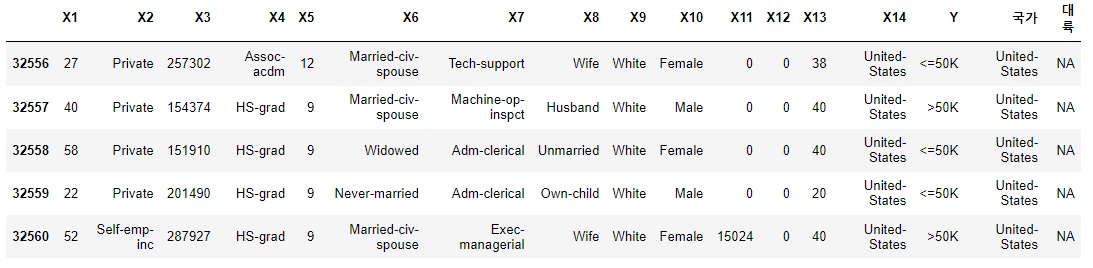

In [33]:
train_merge = pd.merge(train_df, CC,left_on="X14",right_on="국가", how='left')
train_merge.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y,국가,대륙
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,United-States,NaN
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,United-States,NaN
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,United-States,NaN
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,United-States,NaN
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,United-States,NaN


#### 문제 6: 결측값을 있는 행을 제거
- train_df에서 결측값을 제거한 후 train_obs라는 데이데프레임에 대입
- train_df에서 결측값을 제거한 후 test_obs라는 데이데프레임에 대입
- train_obs.isna().sum()을 이용하여 결측값의 개수 확인

In [35]:
train_obs = train_df.dropna()
test_obs = test_df.dropna()
train_obs.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64

#### 문제 7: train_obs와 test_obs에 대해  변수변환 
- "X1"의 값을 구간 (0,30),[30,40),[40,50),[50,60),[60, 100]으로 나누어 범주화하여 "임시변수"에 대입 
- print(임시변수)로 확인
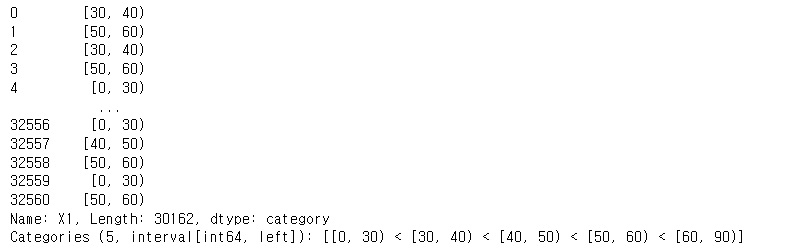


- 같은 구간으로 나누어 "Age2","Age3","Age4","Age5","Age6"으로 명목형 범주로 표시하고 AgeG 변수에 대입(train_obs, test_obs 모두)
- train_obs.AgeG로 확인
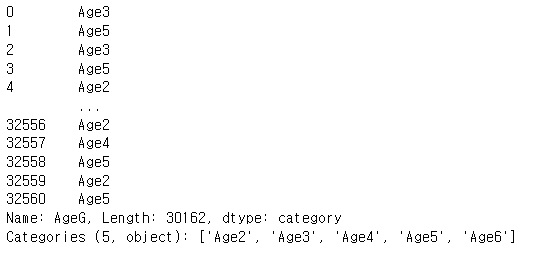

In [49]:
import numpy as np
##1) train_obs
임시변수 = pd.cut(train_obs['X1'],bins = [0,30,40,50,60,100], labels = ["Age2","Age3","Age4","Age5","Age6"])
print(임시변수)

train_obs['AgeG'] = pd.DataFrame(임시변수)
train_obs['AgeG']

##1) test_obs
임시변수2 = pd.cut(test_obs['X1'],bins = [0,30,40,50,60,100], labels = ["Age2","Age3","Age4","Age5","Age6"])
print(임시변수2)

test_obs['AgeG'] = pd.DataFrame(임시변수2)
test_obs['AgeG']

0        Age3
1        Age4
2        Age3
3        Age5
4        Age2
         ... 
32556    Age2
32557    Age3
32558    Age5
32559    Age2
32560    Age5
Name: X1, Length: 32561, dtype: category
Categories (5, object): ['Age2' < 'Age3' < 'Age4' < 'Age5' < 'Age6']
0        Age3
1        Age4
2        Age3
3        Age5
4        Age2
         ... 
32556    Age2
32557    Age3
32558    Age5
32559    Age2
32560    Age5
Name: X1, Length: 32561, dtype: category
Categories (5, object): ['Age2' < 'Age3' < 'Age4' < 'Age5' < 'Age6']


0        Age3
1        Age4
2        Age3
3        Age5
4        Age2
         ... 
32556    Age2
32557    Age3
32558    Age5
32559    Age2
32560    Age5
Name: AgeG, Length: 32561, dtype: category
Categories (5, object): ['Age2' < 'Age3' < 'Age4' < 'Age5' < 'Age6']

#### 문제 8: train_obs의 "X9", "X10", "Y"의 범주에 따른 빈도수 계산
- 출력 형태
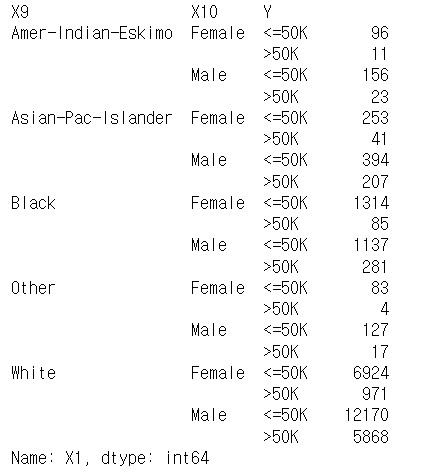

In [53]:
train_obs.groupby(['X9', 'X10', 'Y'])['X1'].count()

X9                  X10     Y    
Amer-Indian-Eskimo  Female  <=50K      107
                            >50K        12
                    Male    <=50K      168
                            >50K        24
Asian-Pac-Islander  Female  <=50K      303
                            >50K        43
                    Male    <=50K      460
                            >50K       233
Black               Female  <=50K     1465
                            >50K        90
                    Male    <=50K     1272
                            >50K       297
Other               Female  <=50K      103
                            >50K         6
                    Male    <=50K      143
                            >50K        19
White               Female  <=50K     7614
                            >50K      1028
                    Male    <=50K    13085
                            >50K      6089
Name: X1, dtype: int64

#### 문제 9: 부분 데이터 선택
- train_obs에서 "X3", "X5", "X10","X13", "AgeG" 자료만 선택하여 trainX에 대입
- train_obs의 'Y'를 선택하여 trainY에 대입
- test_obs에서 "X3", "X5", "X10","X13", "AgeG" 자료만 선택하여 testX에 대입
- test_obs의 'Y'를 선택하여 testY에 대입
- trainX.head()로 확인
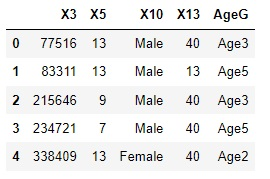

In [56]:
trainX = train_obs[["X3", "X5", "X10","X13", "AgeG" ]]
trainY = train_obs[["Y"]]

testX = test_obs[["X3", "X5", "X10","X13", "AgeG" ]]
testY = test_obs[["Y"]]

trainX.head()

,X3,X5,X10,X13,AgeG
0,77516,13,Male,40,Age3
1,83311,13,Male,13,Age4
2,215646,9,Male,40,Age3
3,234721,7,Male,40,Age5
4,338409,13,Female,40,Age2


#### 문제 10: 가변수 처리
- trainX와 testX의 "X10"와 "AgeG"를 가변수 처리
- X10의 경우 Female은 0, Male은 1
- AgeG의 경우 Age2 = (0,0,0,0), Age3=(1,0,0,0), Age4=(0,1,0,0), Age5=(0,0,1,0), Age6=(0,0,0,1)
- trainX.head()를 확인하면 변수명(column)은 다음과 같이 표시
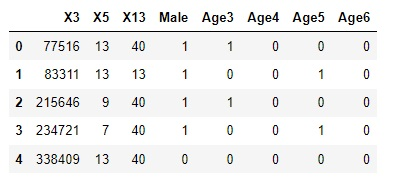

In [ ]:
## trainX
trainX['X10'] = trainX['X10'].replace({'Male':1, 'Female':0})
trainX.columns = ["X3","X5", "Male", "X13", "AgeG"]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
가변수 = OneHotEncoder()  
가변수_col = 가변수.fit_transform(trainX[["AgeG"]])
가변수_col.toarray()

가변수DF = pd.DataFrame(가변수_col.toarray(),columns=["Age2","Age3", "Age4", "Age5","Age6"],index=trainX.index) # 컬럼종류 + 1 만큼 지정하기

trainX = pd.concat([trainX.iloc[:,0:-1],가변수DF],axis=1)

In [96]:
trainX.head()

,X3,X5,Male,X13,Age2,Age3,Age4,Age5,Age6
0,77516,13,1,40,0.0,1.0,0.0,0.0,0.0
1,83311,13,1,13,0.0,0.0,1.0,0.0,0.0
2,215646,9,1,40,0.0,1.0,0.0,0.0,0.0
3,234721,7,1,40,0.0,0.0,0.0,1.0,0.0
4,338409,13,0,40,1.0,0.0,0.0,0.0,0.0


In [97]:
##testX
testX['X10'] = testX['X10'].replace({'Male':1, 'Female':0})
testX.columns = ["X3","X5", "Male", "X13", "AgeG"]

C:\Users\SM-PC\AppData\Local\Temp\ipykernel_10760\1941875081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['X10'] = testX['X10'].replace({'Male':1, 'Female':0})


In [100]:
from sklearn.preprocessing import OneHotEncoder
가변수 = OneHotEncoder()  
가변수_col = 가변수.fit_transform(testX[["AgeG"]])
가변수_col.toarray()

가변수DF = pd.DataFrame(가변수_col.toarray(),columns=["Age2","Age3", "Age4", "Age5","Age6"],index=testX.index) # 컬럼종류 + 1 만큼 지정하기
testX = pd.concat([testX.iloc[:,0:-1],가변수DF],axis=1)
print(testX.head())


       X3  X5  Male  X13  Age2  Age3  Age4  Age5  Age6
0   77516  13     1   40   0.0   1.0   0.0   0.0   0.0
1   83311  13     1   13   0.0   0.0   1.0   0.0   0.0
2  215646   9     1   40   0.0   1.0   0.0   0.0   0.0
3  234721   7     1   40   0.0   0.0   0.0   1.0   0.0
4  338409  13     0   40   1.0   0.0   0.0   0.0   0.0


#### 문제 11: sklearn package를 이용한  Random Foreset 분석
- trainX와 trainY에 대해 tree를 100개 생성, random_state는 1906
- testX를 기반으로 testY 추정 = predY
- testY와 predY에 대한 혼돈행렬 생성과 정확도 계산
- 분류에서 설명변수의 주요도(importance) 결과 출력
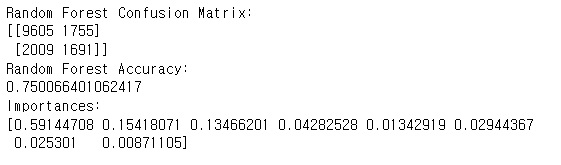

In [104]:
import numpy as np  # 선형대수, 행렬, 벡터
import pandas as pd  # CSV파일 읽기, DataFrame 객체, 평균, 중앙값, 분산, 표준편차, 사분위수, 상관관계
import matplotlib.pyplot as plt  # 박스플랏, 산점도
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = RandomForestClassifier(n_estimators=100, max_features=None, random_state=1906)
model.fit(trainX,trainY)

predY = model.predict(testX)
accuracy = accuracy_score(testY, predY)

cm = confusion_matrix(testY, predY)

importances = model.feature_importances_

print('RandomForest Confusion Acuuracy', cm)
print('RandomForest  Acuuracy', accuracy)
print('importances',importances )

C:\Users\SM-PC\AppData\Local\Temp\ipykernel_10760\2802400648.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(trainX,trainY)


RandomForest Confusion Acuuracy [[24641    79]
 [  155  7686]]
RandomForest  Acuuracy 0.992813488529222
importances [0.56126116 0.16413003 0.04157726 0.11441014 0.07167108 0.01461726
 0.01196027 0.01204928 0.00832351]


#### 12: StatsModels package를 이용한 Logistic 분석
- trainX와 trainY를 이용하여 모형 적합
    - 참고로 StatsModels에서는 반응변수가 숫자로 표시되어야 함
    - 적합결과 출력
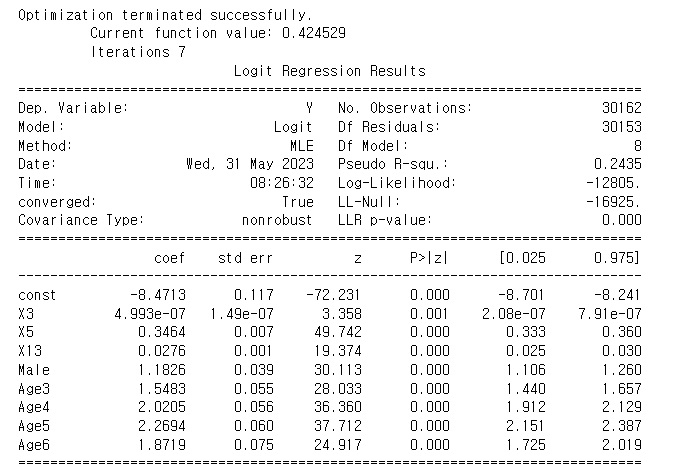


- testX를 적합한 모형에 대입하여 ">50K"일 확률 계산
    - 앞의 5개 자료에 대한 확률출력
- ">50K"일 확률이 0.5보다 크면 ">50K"로 아니면 "<=50K"로 할당
- 혼돈행렬 결과 출력
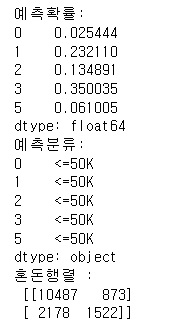


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  
import statsmodels.api as sm 

In [112]:
# 칼럼 값을 숫자로 변경 
trainy = trainY['Y'].replace({'<=50K':0, '>50K':1})

In [113]:
#적합 결과 출력

logit_sm = sm.Logit(trainy, sm.add_constant(trainX)).fit()
print(logit_sm.summary())

Optimization terminated successfully.
         Current function value: 0.417374
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32552
Method:                           MLE   Df Model:                            8
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.2439
Time:                        16:32:09   Log-Likelihood:                -13590.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7528   5.78e+05  -9.95e-06      1.000   -1.13e+06    1.13e+06
X3          4.314e-07   1.45e

In [116]:
#혼돈 행렬 결과 출력
from sklearn.metrics import confusion_matrix, accuracy_score
muhat = logit_sm.predict(sm.add_constant(testX))
cm = confusion_matrix(testX, muhat)


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and continuous targets

#### 문제 13: 현재 작업 폴더에 데이터 저장
- trainX와 trainY를 train이라는 데이터프레임으로 병합하고 Y의 값을 ">50K"는 1, "<=50K"는 0으로 바꿈
    - 위에서  Y의 값을 ">50K"는 1, "<=50K"는 0으로 변경했다면 train으로 병합만 함
- testX와 testY를 test이라는 데이터프레임으로 병합하고 Y의 값을 ">50K"는 1, "<=50K"는 0으로 바꿈
    - 위에서  Y의 값을 ">50K"는 1, "<=50K"는 0으로 변경했다면 test로 병합만 함
- train을 "train.parquet", test를 "test.csv" 파일로 저장
- test.head()로 확인
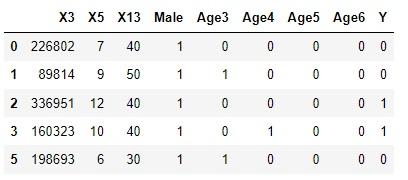

In [120]:
train = pd.merge(trainX, trainY,left_index=True, right_index=True)
train.to_parquet('train.parquet')
test = pd.merge(testX, testY,left_index=True, right_index=True)
test.to_csv('train.csv')

#### 문제 14: Spark 데이터프레임 생성
- "train_obs.parquet" 파일 자료를 train_sp 스파크 데이터프레임에 대입
- "test_obs.csv" 파일 자료를 test_sp 스파크 데이터프레임에 대입
- train_sp.show()로 확인
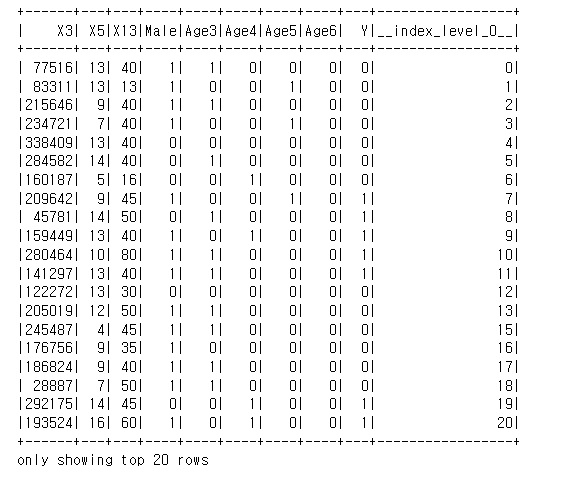

#### 문제 15: Spark 패키지를 이용한 Logistic 분석
- X3, X5, X13, Male, Age3, Age4, Age5, Age6를 설명변수, Y를 반응변수로 설정한 로지스틱 분석
- train_sp를 이용하여 모형을 적합하고 test_sp에 해당하는 예측값 유도
- 예측분류의 정확도 확인
- test_sp에 대한 예측결과를 "예측"이라고 할 때 "예측.predictions.show()"와 AUC로 확인
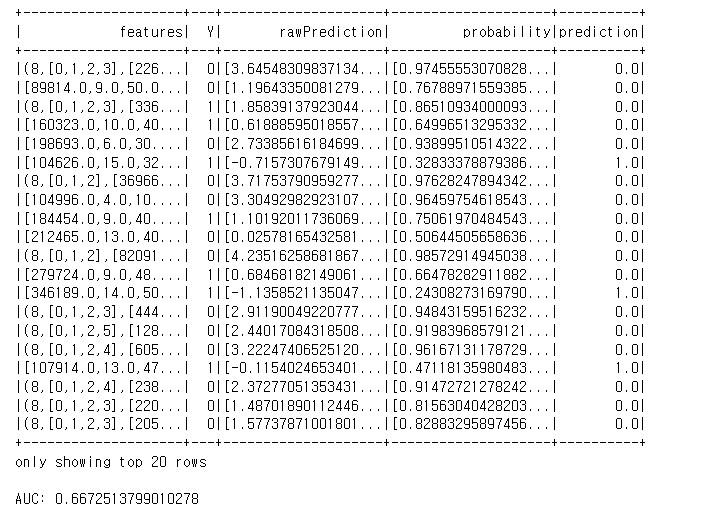

#### 문제 16. Spark로 하둡에 데이터프레임 저장하기
- hadoop 실행
- hadoop /Spark 폴더에 있는 train_sp를 "parquet" 폴더에 저장
- hadoop /Spark 폴더에 있는 test_sp를 "csv" 폴더에 저장